In [34]:
import csv
import zipfile
import os
import pandas as pd
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

In [2]:
!wget -O - 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip' > 'data.zip'

--2017-11-08 23:20:48--  https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip
Resolving s3.amazonaws.com... 54.231.98.107
Connecting to s3.amazonaws.com|54.231.98.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23145783 (22M) [application/zip]
Saving to: “STDOUT”

100%[======================================>] 23,145,783  47.9M/s   in 0.5s    

2017-11-08 23:20:49 (47.9 MB/s) - written to stdout [23145783/23145783]



In [3]:
!ls $PUIDATA

201512-citibike-tripdata.csv
data.zip
Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv
Manhattan
mn_mappluto_16v2.zip
rows.csv
yellow_tripdata_2009-02.csv


In [4]:
!ls

201512-citibike-tripdata.csv  data.zip	HW7_1_ekh331.ipynb


In [5]:
cmd = "mv data.zip " + os.getenv("PUIDATA")
os.system(cmd)

0

In [6]:
zip_path = os.path.join(os.getenv("PUIDATA"), 'data.zip')
print(os.path.exists(zip_path))
zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/data.zip', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))

True


In [7]:
os.getenv("PUIDATA") + '/data.zip'
os.path.exists(os.getenv("PUIDATA") + '/data.zip')

True

In [19]:
real_df = pd.read_csv(os.getenv("PUIDATA") + "/201512-citibike-tripdata.csv")
#real_df = pd.read_csv('201512-citibike-tripdata.csv')

df = real_df


In [20]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


# Idea: Customers are more likely than Subscribers to have longer bike trips.
<p>
<p>
# Null Hypothesis: 
## The average trip duration of subscribers is the same or greater than the average trip duration of customers.


${S_{\mathrm{duration}}} >= {T_{\mathrm{duration}}} $
<p>

# Alternative Hypothesis:
## The average trip duration of subscribers is less than the average trip duration of customers.

${S_{\mathrm{duration}}} < {T_{\mathrm{duration}}} $
<p>

<p>


# Significance level alpha = 0.05

<p>

# The data month is December 2015.



In [21]:
df.columns

# Now we need to separate out 'usertype' and 'date', continued...

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [22]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)

In [23]:
df.head()

,tripduration,usertype
0,475,Subscriber
1,684,Subscriber
2,1063,Subscriber
3,1075,Subscriber
4,293,Subscriber


In [24]:
# Now to separate subscribers from customers

#groups = df.groupby(['usertype', 'starttime'].mean())

In [25]:
print(df.shape)

subscribers = df[df['usertype'] == 'Subscriber']
print(np.mean(subscribers['tripduration']))
everyoneelse = df[df['usertype'] != 'Subscriber']
print(everyoneelse.shape)
print(np.mean(everyoneelse['tripduration']))

subscriber_avg = np.mean(subscribers['tripduration'])
customer_avg = np.mean(everyoneelse['tripduration'])

(804125, 2)
797.317738045
(67877, 2)
2555.30983986


In [26]:
s_mu = np.mean(subscribers['tripduration'])
s_sd = np.std(subscribers['tripduration'])
s_normal_durations = [duration for duration 
                    in subscribers['tripduration'] 
                    if duration < s_mu + 3 * s_sd]

In [28]:
print(len(s_normal_durations))
print(len(subscribers['tripduration']))

735443
736248


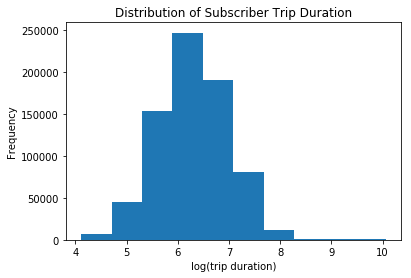

In [29]:
log_normal_durations = [np.log(duration) for duration in s_normal_durations]
plt.hist(log_normal_durations)
plt.xlabel('log(trip duration)')
plt.ylabel('Frequency')
plt.title('Distribution of Subscriber Trip Duration')
plt.show()

In [30]:
c_mu = np.mean(everyoneelse['tripduration'])
c_sd = np.std(everyoneelse['tripduration'])
c_normal_durations = [duration for duration 
                    in everyoneelse['tripduration'] 
                    if duration < c_mu + 3 * c_sd]

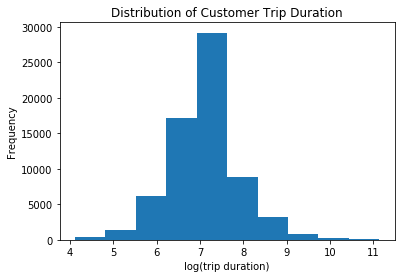

In [31]:
c_log_normal_durations = [np.log(duration) for duration in c_normal_durations]
plt.hist(c_log_normal_durations)
plt.xlabel('log(trip duration)')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Trip Duration')
plt.show()

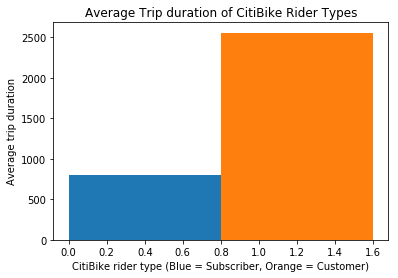

In [32]:
#plot the averages

plt.bar(0, align='edge', height=subscriber_avg)
plt.bar(0.8,align='edge', height=customer_avg)
plt.ylabel('Average trip duration')
plt.xlabel('CitiBike rider type (Blue = Subscriber, Orange = Customer)')
plt.title('Average Trip duration of CitiBike Rider Types')
plt.show()

## Figure 1: A bar plot showing the average trip durations of CitiBike subscribers (left) versus CitiBike customers (right). Customers show a significantly longer average trip duration.

## Now we test the hypothesis that the means of two distributions (duration of Subscribers and duration of Customers) are equal. Given the above plot, we expect that we should be able to reject the null hypothesis. We will use the t-test for difference in means.

In [33]:
# We start by computing the standard error of the sampling distribution
std_s = np.std(subscribers['tripduration'])
std_c = np.std(everyoneelse['tripduration'])
mu_s, mu_c = subscriber_avg, customer_avg
n_s, n_c = subscribers.shape[0], everyoneelse.shape[0]

std_err = np.sqrt(std_s**2 / n_s + std_c**2 / n_c)
t = (mu_c - mu_s) / std_err


print("Difference in means: " + str(mu_c - mu_s))
print("std_s: " + str(std_s))
print("std_c: " + str(std_c))
print("n_s, n_c: %s, %s" % (n_s, n_c))
print(t)


Difference in means: 1757.99210181
std_s: 7532.64640363
std_c: 22201.4357459
n_s, n_c: 736248, 67877
20.5212954438


## This huge t-value is not really surprising considering the big difference in means that we observe above, and also the large sample size.

In [35]:
# Normal cdf
# Our sample size is so large that the t distribution with many degrees of freedom is very close to a normal distribution

p_val = 1 - norm.cdf(t)
print(p_val)

0.0


## Unsurprisingly the p-value is very very close to 0, with such a large t-value.